In [ ]:
import time, sys

def countdown(t):
    while t:
        mins, secs = divmod(t, 60)
        timeformat = '{:02d}:{:02d}'.format(mins, secs)
        sys.stdout.write('\r' + str(timeformat))
        sys.stdout.flush()
        time.sleep(1)
        t -= 1
    print("Time's Up! \n")

In [ ]:
countdown(1 * 60)

In [1]:
import os

import pandas as pd
from pandas import Series, DataFrame 

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
pd.set_option('notebook_repr_html', False) 

%pylab inline 

print pd.__version__

path = os.getcwd()
path

Populating the interactive namespace from numpy and matplotlib
0.18.1


"/Users/lr/Dropbox/Cisco [Sept 16']/4. Pandas/Pandas Practice"

-------------------------------------------------------------------------------------------------

## Check the contents of the Working Directory

In [2]:
!ls

Data
Ques
pandasPractice_Baseball_Iris_Slaughter.ipynb
pandasPractice_Football.ipynb
pandasPractice_MovieLens.ipynb
q4.py


In [3]:
os.listdir(path + '/Data')

['u.data', 'u.item', 'u.user']

---

## Inspect Data

- First try importing a sample of the file to get an idea of 
    - delimiter
    - data types for each column (especially watch out for columns with mixed types)
    - missing value indicators
- Then, import the whole file

---

#### 1. Use CLI commands to inspect your file without opening/importing it

In [4]:
os.chdir(path + '/Data/')

In [5]:
!ls

u.data u.item u.user


In [6]:
! head -n 5 u.user

1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213


In [7]:
!wc -l u.user

     943 u.user


In [8]:
! head -n 9 u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [9]:
!wc -l u.item

    1682 u.item


In [10]:
! head -n 9 u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817


In [11]:
!wc -l u.data

  100000 u.data


### We find that 

- There are different delimiters in each file
- The column names aren't provided, so we'll have to supply them
---

## Import Data

- `read_csv()` arguments used here
    - `sep=`, 
    - `names=` 
    - `usecols=`   

### 1. Users data

In [12]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(path + '/Data/u.user', sep='|', names=u_cols)
users.head()

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

### 2. Ratings data

In [13]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv(path + '/Data/u.data', sep='\t', names=r_cols)
ratings.head()

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596

In [14]:
ratings['timestamp'] = pd.to_datetime(ratings['unix_timestamp'], unit='s')

ratings.drop('unix_timestamp', axis=1, inplace=True)

In [15]:
ratings.head()

   user_id  movie_id  rating           timestamp
0      196       242       3 1997-12-04 15:55:49
1      186       302       3 1998-04-04 19:22:22
2       22       377       1 1997-11-07 07:18:36
3      244        51       2 1997-11-27 05:02:03
4      166       346       1 1998-02-02 05:33:16

### 3. Movies Data

- the movies file contains columns indicating the movie's genres
- let's only load the first five columns of the file with usecols

In [16]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

movies = pd.read_csv(path + '/Data/u.item', sep='|', names=m_cols, usecols=range(5))
print movies.head()

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)  


In [17]:
movies['release_date'] = movies.release_date.map(lambda x: pd.to_datetime(x))

In [18]:
movies.head()

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)   1995-01-01                 NaN   
1         2   GoldenEye (1995)   1995-01-01                 NaN   
2         3  Four Rooms (1995)   1995-01-01                 NaN   
3         4  Get Shorty (1995)   1995-01-01                 NaN   
4         5     Copycat (1995)   1995-01-01                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)  

---

## Explore Data

### The `.dtypes` method

In [19]:
# for getting basic information about your DataFrame, try
print movies.dtypes, '\n'
print ratings.dtypes, '\n'
print users.dtypes

movie_id                       int64
title                         object
release_date          datetime64[ns]
video_release_date           float64
imdb_url                      object
dtype: object 

user_id               int64
movie_id              int64
rating                int64
timestamp    datetime64[ns]
dtype: object 

user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object


### The `describe()` method

is great for seeing basic statistics about ALL numeric columns in a dataset.

In [20]:
users.describe()['age']

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

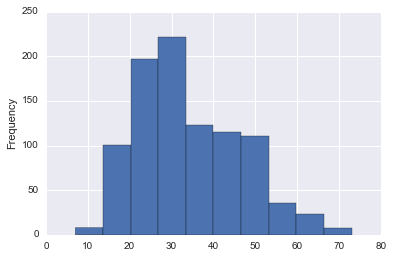

In [24]:
users['age'].plot.hist();

In [21]:
ratings.describe()['rating']

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

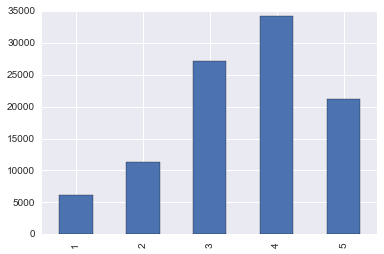

In [23]:
ratings['rating'].value_counts().sort_index().plot.bar();

---
## Slicing

*** Selecting a single column*** from the DataFrame will return a Series object.

In [25]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

***To select multiple columns***, simply pass a list of column names to the DataFrame, the output of which will be a DataFrame.

In [26]:
users[['age', 'zip_code']].head()

   age zip_code
0   24    85711
1   53    94043
2   23    32067
3   24    43537
4   33    15213

***Row selection*** can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [27]:
# users older than 25
print users[users.age > 25].head(3)
print '\n'

# users aged 40 AND male
print users[(users.age == 40) & (users.sex == 'M')].head(3)
print '\n'

# users younger than 30 OR female
print users[(users.sex == 'F') | (users.age < 30)].head(3)

   user_id  age sex occupation zip_code
1        2   53   F      other    94043
4        5   33   F      other    15213
5        6   42   M  executive    98101


     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067


-------------------------------------------------------------------------------------------------

## Using `set_index`  


The default (automatically generated) index is mostly meaningless. We can change it using the `set_index()` method. 

Let's set it to the `user_id`. 

By default, `set_index` returns a new DataFrame, so you'll have to specify if you'd like the changes to occur in place.

In [28]:
print users.set_index('user_id').head()
print '\n'

print users.head()
print "\n Changes weren't applied. \n\n"

users.set_index('user_id', inplace=True)
print users.head()
print "\n Changes were applied. \n\n"

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

 Changes weren't applied. 


         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213

 Changes were applied. 




In [ ]:
# To modify the df without creating a copy, use inplace=True
users.set_index('user_id', inplace=True)
users.head()

If we realize later that we liked the old pandas default index, we can just use ***`reset_index`*** 

The same rules for inplace apply.

In [29]:
users.reset_index(inplace=True)
print users.head()

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


We can ***select rows based on the index*** using _the ix method_.

In [ ]:
print users.ix[99]
print '\n'
print users.ix[[1, 50, 300]]

-------------------------------------------------------------------------------------------------

## Sorting

To sort a DataFrame, we use the `sort_values` method

In [30]:
# To sort a DataFrame: users in descending order of age
users.sort_values(by='age', ascending=False, inplace=True)
users.head()

     user_id  age sex     occupation zip_code
480      481   73   M        retired    37771
802      803   70   M  administrator    78212
766      767   70   M       engineer    00000
859      860   70   F        retired    48322
584      585   69   M      librarian    98501

In [31]:
# To sort a Series
users['age'].sort_values(ascending=False).head()

480    73
802    70
766    70
859    70
584    69
Name: age, dtype: int64

-------------------------------------------------------------------------------------------------

## Join! (merging)
With the movie data, it's possible for a user to be associated with zero or many ratings and movies. 

Likewise, a movie can be rated zero or many times, by a number of different users.

`pandas.merge` allows two DataFrames to be joined on one or more keys. The function provides a series of parameters (`on, left_on, right_on, left_index, right_index`) allowing you to specify the columns or indexes on which to join.

By default, pandas.merge operates as an inner join, which can be changed using ***the `how` parameter.***

In [32]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print left_frame
print '\n'
print right_frame


   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


In [33]:
pd.merge(left_frame, right_frame)

   key left_value right_value
0    2          c           f
1    3          d           g
2    4          e           h

#### pd.merge parameters

* _Had our key columns not been named the same_, we could have used the ***left_on and right_on parameters*** to specify which fields to join from each frame.

`pd.merge(left_frame, right_frame, left_on='left_key', right_on='right_key')`


* Alternatively, _if our keys were indexes_, we could use the ***left_index or right_index parameters***, which accept a True/False value. 



You can ***mix and match columns and indexes*** like so: 

`pd.merge(left_frame, right_frame, left_on='key', right_index=True)`

##### left/right outer join

In [34]:
pd.merge(left_frame, right_frame, on='key', how='left')

   key left_value right_value
0    0          a         NaN
1    1          b         NaN
2    2          c           f
3    3          d           g
4    4          e           h

In [ ]:
# We keep everything from the left frame, pulling in the value from the right frame where the keys match up. 
# The right_value is NULL where keys do not match (NaN)

##### Full Outer Join

In [35]:
pd.merge(left_frame, right_frame, on='key', how='outer')

   key left_value right_value
0  0.0          a         NaN
1  1.0          b         NaN
2  2.0          c           f
3  3.0          d           g
4  4.0          e           h
5  5.0        NaN           i
6  6.0        NaN           j

In [ ]:
# We've kept everything from both frames, regardless of whether or not there was a match on both sides. 
# Where there was not a match, the values corresponding to that key are NULL.

-------------------------------------------------------------------------------------------------

### Append! (concatenating/union-ing)

`pandas.concat` takes a list of Series or DataFrames and returns a Series or DataFrame of the concatenated objects. 

Note that because the function takes list, you can combine many objects at once.

*** By default**, the function will vertically append the objects to one another, combining columns with the same name. 

In [36]:
pd.concat([left_frame, right_frame])

   key left_value right_value
0    0          a         NaN
1    1          b         NaN
2    2          c         NaN
3    3          d         NaN
4    4          e         NaN
0    2        NaN           f
1    3        NaN           g
2    4        NaN           h
3    5        NaN           i
4    6        NaN           j

We can see above that values not matching up will be NULL.

Additionally, objects can be _concatentated side-by-side_ using the function's ***`axis` parameter***

In [37]:
pd.concat([left_frame, right_frame], axis=1)

   key left_value  key right_value
0    0          a    2           f
1    1          b    3           g
2    2          c    4           h
3    3          d    5           i
4    4          e    6           j

This is something like a cbind.

-------------------------------------------------------------------------------------------------

### groupby!
The pandas `groupby` method draws largely from the split-apply-combine strategy for data analysis.


In [38]:
sac = DataFrame({'numbers': np.random.randn(100), 'letters': list('abcde') * 20})

In [40]:
sac[:5]

  letters   numbers
0       a -0.210776
1       b  0.118037
2       c  0.139282
3       d -0.915439
4       e -1.160759

In [41]:
sac.groupby('letters').sum()

          numbers
letters          
a        1.195089
b       -7.605545
c        0.707522
d       -1.467606
e       -1.350039

In [42]:
sac.groupby('letters').count()

         numbers
letters         
a             20
b             20
c             20
d             20
e             20

In [43]:
# NOTE: count() returns a DataFrame object, whereas size() returns a Series object
sac.groupby('letters').size()

letters
a    20
b    20
c    20
d    20
e    20
dtype: int64

In [44]:
# also;
sac.letters.value_counts()

d    20
e    20
b    20
c    20
a    20
Name: letters, dtype: int64

In [ ]:
# Let's find the youngest male reviewer by occupation

In [49]:
users.head()

     user_id  age sex     occupation zip_code
480      481   73   M        retired    37771
802      803   70   M  administrator    78212
766      767   70   M       engineer    00000
859      860   70   F        retired    48322
584      585   69   M      librarian    98501

In [54]:
(users
 .groupby('occupation')
 .apply(lambda x: x[x['sex']=='M'].sort_values(by='age').iloc[0, :])
 .age
).head(5)

occupation
administrator    21
artist           20
doctor           28
educator         25
engineer         22
Name: age, dtype: int64

---
## Tasks: Pandas on the MovieLens dataset

### Q0. Import and Merge the Data

In [ ]:
os.chdir(path + '/Ques/')

In [2]:
# %%writefile Q0.py

# IMPORT THE DATA

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(path + '/Data/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(path + '/Data/u.data', sep='\t', names=r_cols)

# Load only the first five columns of the movies file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(path + '/Data/u.item', sep='|', names=m_cols, usecols=range(5))

# MERGE ALL THE DATA 
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
lens.head()

   movie_id                  title release_date  video_release_date  \
0         1       Toy Story (1995)  01-Jan-1995                 NaN   
1         4      Get Shorty (1995)  01-Jan-1995                 NaN   
2         5         Copycat (1995)  01-Jan-1995                 NaN   
3         7  Twelve Monkeys (1995)  01-Jan-1995                 NaN   
4         8            Babe (1995)  01-Jan-1995                 NaN   

                                            imdb_url  user_id  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...      308       4   
1  http://us.imdb.com/M/title-exact?Get%20Shorty%...      308       5   
2  http://us.imdb.com/M/title-exact?Copycat%20(1995)      308       4   
3  http://us.imdb.com/M/title-exact?Twelve%20Monk...      308       4   
4     http://us.imdb.com/M/title-exact?Babe%20(1995)      308       5   

   unix_timestamp  age sex occupation zip_code  
0       887736532   60   M    retired    95076  
1       887737890   60   M    retire

### Q1. What are the 15 most rated movies?

In [ ]:
countdown(5 * 60)

In [59]:
%%timeit 
# %load q1.py

# Use the size method to get the count of records in each group

(lens
 .groupby('title')
 .size()
 .sort_values(ascending=False)[:15])

100 loops, best of 3: 8.12 ms per loop


In [60]:
%%timeit
# Aliter: 
# %timeit 
lens['title'].value_counts()[:15]

100 loops, best of 3: 6.68 ms per loop


### Q2. Which movies are most highly rated (average score over >100 votes)?

In [ ]:
countdown(5 * 60)

In [67]:
# %load q2.py

# movies with over 100 votes
voted_150 = set(lens.title.value_counts()[lens.title.value_counts() > 150].index)

(lens
 .loc[lens.title.isin(voted_150)]
 .groupby('title')
 .apply(lambda x: x['rating'].mean())
 .sort_values(ascending=False)[:10])

title
Schindler's List (1993)                   4.466443
Casablanca (1942)                         4.456790
Shawshank Redemption, The (1994)          4.445230
Rear Window (1954)                        4.387560
Usual Suspects, The (1995)                4.385768
Star Wars (1977)                          4.358491
Citizen Kane (1941)                       4.292929
To Kill a Mockingbird (1962)              4.292237
One Flew Over the Cuckoo's Nest (1975)    4.291667
Silence of the Lambs, The (1991)          4.289744
dtype: float64

### Q3. Which movies are most controversial amongst different age groups?

> - Note:
> - A high standard deviation in ratings across groups means that the different age groups gave ratings far from the mean
> - Ignore the ratings of the 0-9 and 80-89 age groups because they pollute the results.

      age age_group
0      60     60-69
397    21     20-29
459    33     30-39
524    30     30-39
782    23     20-29
995    29     20-29
1229   26     20-29
1664   31     30-39
1942   24     20-29
2270   32     30-39


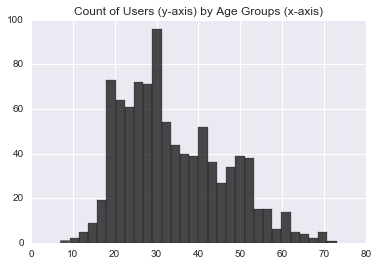

In [76]:
# %load Q3.py

# Distribution of users by age
users['age'].hist(bins=30, color='k', alpha=0.7)
plt.title('Count of Users (y-axis) by Age Groups (x-axis)')

# Binning users into age groups
bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new column
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=bins)

# Check if binning went okay
print lens[['age', 'age_group']].drop_duplicates()[:10]

In [85]:
(pd.pivot_table(data=lens.loc[lens.title.isin(voted_150), :], 
               index='title', 
               columns='age_group', 
               values='rating', 
               aggfunc=np.mean)
 .drop(['0-9', '70-79'], axis=1)
 .std(axis=1)
 .sort_values(ascending=False))

title
Beavis and Butt-head Do America (1996)          0.910554
Starship Troopers (1997)                        0.752654
Boot, Das (1981)                                0.677041
Fifth Element, The (1997)                       0.653465
Speed (1994)                                    0.561025
Birds, The (1963)                               0.473794
Chasing Amy (1997)                              0.468521
Pretty Woman (1990)                             0.461923
Face/Off (1997)                                 0.455151
Willy Wonka and the Chocolate Factory (1971)    0.443448
                                                  ...   
Apt Pupil (1998)                                0.107460
Quiz Show (1994)                                0.105136
L.A. Confidential (1997)                        0.104205
Gandhi (1982)                                   0.100273
Lion King, The (1994)                           0.093952
Top Gun (1986)                                  0.093151
Sleepless in Seattle (199

In [90]:
# Method 2
(lens
 .loc[lens.title.isin(voted_150), :]
 .groupby(['title', 'age_group'])
 .apply(lambda x: x.rating.mean())
).unstack().std(axis=1).sort_values(ascending=False)
### Using `unstack` to convert ***long-to-wide*** data

# A high standard deviation in ratings across groups means that the different age groups gave ratings far from the mean
# I'm ignoring the ratings of the 0-9 and 80-89 age groups because they pollute the results.

title
Schindler's List (1993)                      1.326021
Beavis and Butt-head Do America (1996)       0.910554
Starship Troopers (1997)                     0.895718
Saint, The (1997)                            0.883850
Boot, Das (1981)                             0.677041
Boogie Nights (1997)                         0.675102
Fifth Element, The (1997)                    0.653465
Batman (1989)                                0.631338
Star Trek: First Contact (1996)              0.630472
George of the Jungle (1997)                  0.589372
                                               ...   
L.A. Confidential (1997)                     0.122018
Mission: Impossible (1996)                   0.121790
Mars Attacks! (1996)                         0.120179
Mr. Holland's Opus (1995)                    0.119976
Indiana Jones and the Last Crusade (1989)    0.111852
Quiz Show (1994)                             0.105136
Gandhi (1982)                                0.100273
Lion King, The (1994) 

### Q4. Which movies do men and women most disagree on?

In [ ]:
countdown(5 * 60)

In [91]:
# %load Q4.py

pivoted=pd.pivot_table(lens,
                       index=['title'],
                       columns=['sex'],
                       values='rating',
                       aggfunc=np.mean,
                       fill_value=0)
# print pd.concat([pivoted.head(), pivoted.tail()])

In [93]:
pivoted.reset_index(inplace=True)

In [94]:
pivoted = pivoted[pivoted.title.isin(voted_150)]

In [100]:
pivoted.loc[:, 'diff'] = pivoted.loc[:, 'M'] - pivoted.F

/Users/lr/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [99]:
pivoted.sort_values('diff', ascending=False).loc[:, ['title', 'diff']]

sex                                    title      diff
232     Bridge on the River Kwai, The (1957)  0.621978
7               2001: A Space Odyssey (1968)  0.612732
571                 Full Metal Jacket (1987)  0.587992
143   Beavis and Butt-head Do America (1996)  0.587293
317               Clockwork Orange, A (1971)  0.564379
1397     Star Trek: The Wrath of Khan (1982)  0.535803
1565                       Unforgiven (1992)  0.525040
1461                  Terminator, The (1984)  0.512910
519                Fifth Element, The (1997)  0.493380
41                              Alien (1979)  0.462690
...                                      ...       ...
1297            Sense and Sensibility (1995) -0.374019
1588                          Volcano (1997) -0.377441
618                Gone with the Wind (1939) -0.404558
1149                       Piano, The (1993) -0.412500
733                          In & Out (1997) -0.418925
1016           Much Ado About Nothing (1993) -0.464463
596       